<a href="https://colab.research.google.com/github/shobhit-saini/Neural_Network/blob/master/XOR_Implementation_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0.]
 [1.]
 [1.]
 [0.]]
Iteration vs Loss Graph


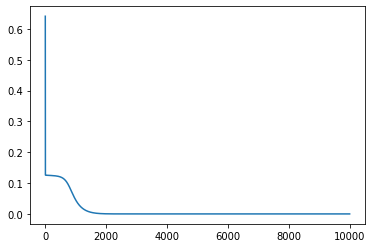

In [9]:
"""
Implement EX-OR operation using Artificial Neural Network and calculate the loss after generating the model. The dataset to be considered is as follows:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]
The implementation should not have any inbuilt libraries or any previous implementations. Evaluate the loss v/s iteration curve.

"""
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0,0],[0,1],[1,0],[1,1]]) # 4*2
y = np.array([[0],[1],[1],[0]]) #1*4

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

Input_Size = 2
Output_Size = 1
Neurons = 4
Learning_rate = 0.1

weight1 = np.random.uniform(size = (Input_Size, Neurons))  # Dimension: 2*4
weight2 = np.random.uniform(size = (Neurons, Output_Size)) # 4*1

loss = []
iteration = []
for i in range(10000):
  tmp = np.dot(x, weight1) #4*2 ** 2*4 = 4*4   
  res1 = sigmoid(tmp) # 4*4  1*4
  out = np.dot(res1, weight2) # 4*4 ** 4*1 = 4*1 

  del_out = (out - y) #4*1 
  val = 0 
  for j in range(4):
    val += (y[j]-out[j])*(y[j]-out[j])
  val = val/(2*4);
  loss.append( val )
  iteration.append(i);
  err = Learning_rate*np.dot(res1.T, del_out) # 4*4 ** 4*1 = 4*1
  weight2 -= err
  del_hid = np.dot(del_out, weight2.T) * sigmoid_prime(tmp)
  err1 = np.dot(x.T, del_hid)
  weight1 -= Learning_rate*err1  
  #print(out)

def model():
  tmp = np.dot(x, weight1) #4*2 ** 2*4 = 4*4   
  res1 = sigmoid(tmp) # 4*4  1*4
  out = np.dot(res1, weight2) # 4*4 ** 4*1 = 4*1 
  for i in range(4):
    if out[i][0] < 0.5:
      out[i][0] = 0
    else:
      out[i][0] = 1
  print(out)

model()
print( "Iteration vs Loss Graph" )
plt.plot( iteration, loss )
plt.show()

